In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


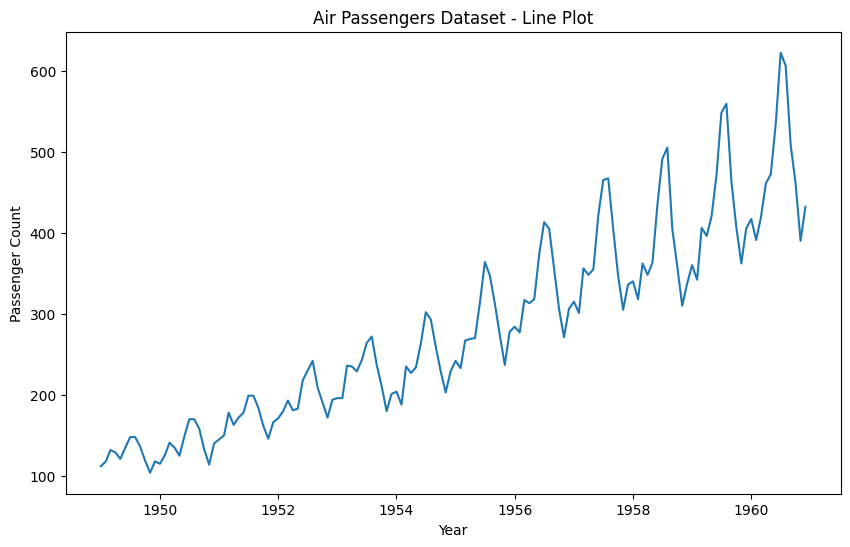

In [ ]:
# Visualize the time series using line plot
plt.figure(figsize=(10, 6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Air Passengers Dataset - Line Plot')
plt.show()

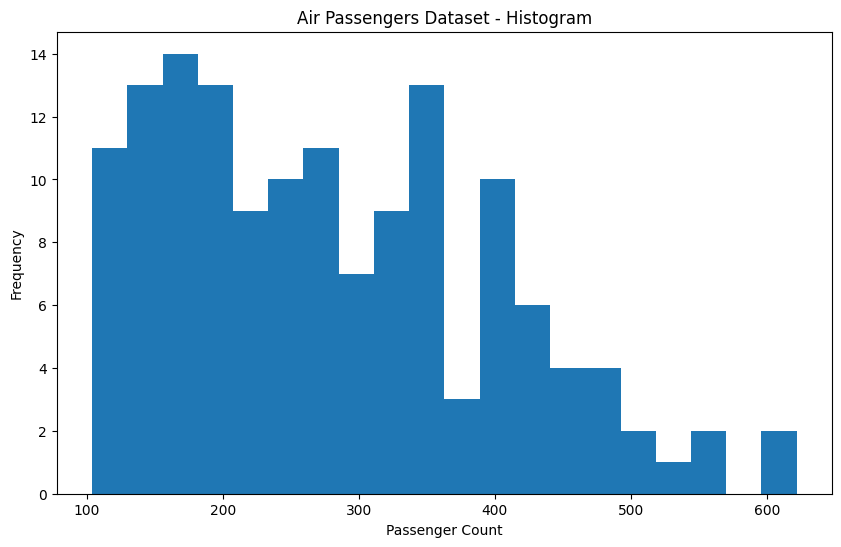

In [ ]:
# Visualize the time series using histogram
plt.figure(figsize=(10, 6))
plt.hist(df['#Passengers'], bins=20)
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Air Passengers Dataset - Histogram')
plt.show()

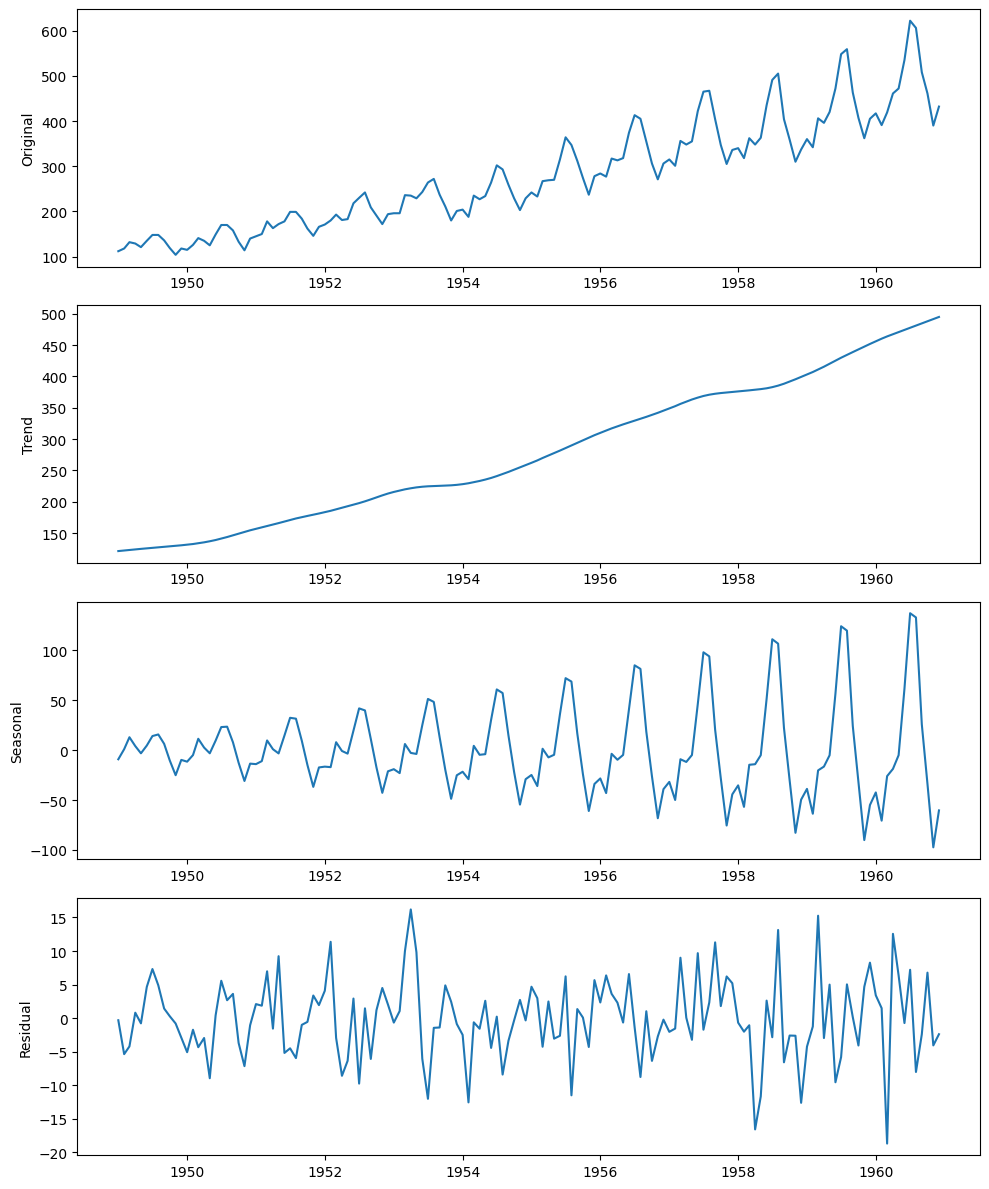

In [ ]:
# Perform STL decomposition
stl = STL(df, seasonal=13)
result = stl.fit()

# Plot the decomposition components
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(df)
ax[0].set_ylabel('Original')
ax[1].plot(result.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(result.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(result.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [ ]:
# Handling missing values
df['#Passengers'] = df['#Passengers'].replace(0, np.nan)
df['#Passengers'] = df['#Passengers'].interpolate()

# Smoothing noisy data
window_length = 5
df['#Passengers'] = df['#Passengers'].rolling(window_length, center=True).mean()
print(df['#Passengers'])

Month
1949-01-01       NaN
1949-02-01       NaN
1949-03-01       NaN
1949-04-01       NaN
1949-05-01    131.24
               ...  
1960-08-01    526.20
1960-09-01    514.24
1960-10-01    500.40
1960-11-01       NaN
1960-12-01       NaN
Name: #Passengers, Length: 144, dtype: float64


In [ ]:
# Data transformation (log transformation)
df['#Passengers'] = np.log(df['#Passengers'])

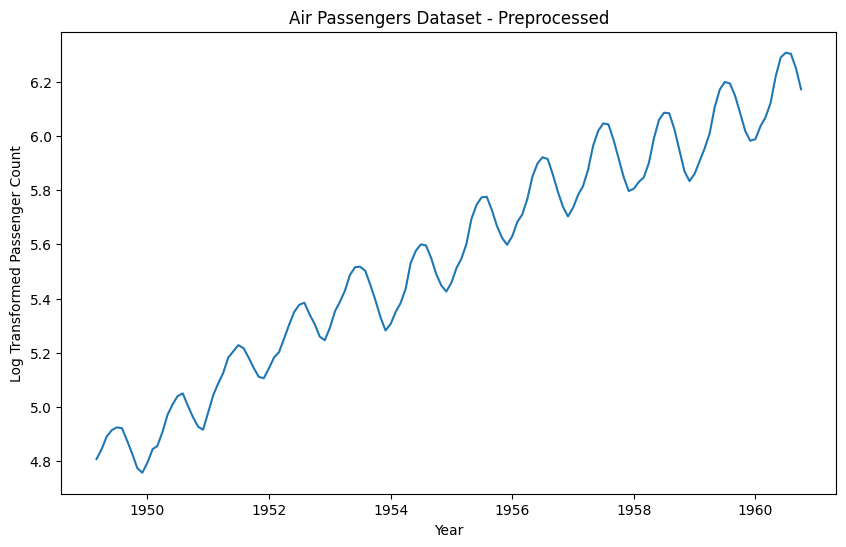

In [ ]:
# Visualize the preprocessed data
plt.figure(figsize=(10, 6))
plt.plot(df['#Passengers'])
plt.xlabel('Year')
plt.ylabel('Log Transformed Passenger Count')
plt.title('Air Passengers Dataset - Preprocessed')
plt.show()

In [ ]:
# Split the dataset into training and testing sets
train = df[:'1959']
test = df['1960':]

In [ ]:
# ARIMA model
model_arima = ARIMA(train, order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())
# Generate forecasts
forecast_arima = model_arima_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -625.518
Date:                Thu, 20 Jul 2023   AIC                           1257.035
Time:                        09:25:01   BIC                           1265.661
Sample:                    01-01-1949   HQIC                          1260.540
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5436      0.100     -5.443      0.000      -0.739      -0.348
ma.L1          0.9272      0.051     18.336      0.000       0.828       1.026
sigma2       816.5398     95.147      8.582      0.0

In [ ]:
# SARIMAX model
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())
forecast_sarima = model_sarima_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -445.700
Date:                            Thu, 20 Jul 2023   AIC                            901.399
Time:                                    09:25:07   BIC                            915.295
Sample:                                01-01-1949   HQIC                           907.042
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4952      0.313     -1.580      0.114      -1.109       0.119
ma.L1          0.2559      0.336   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


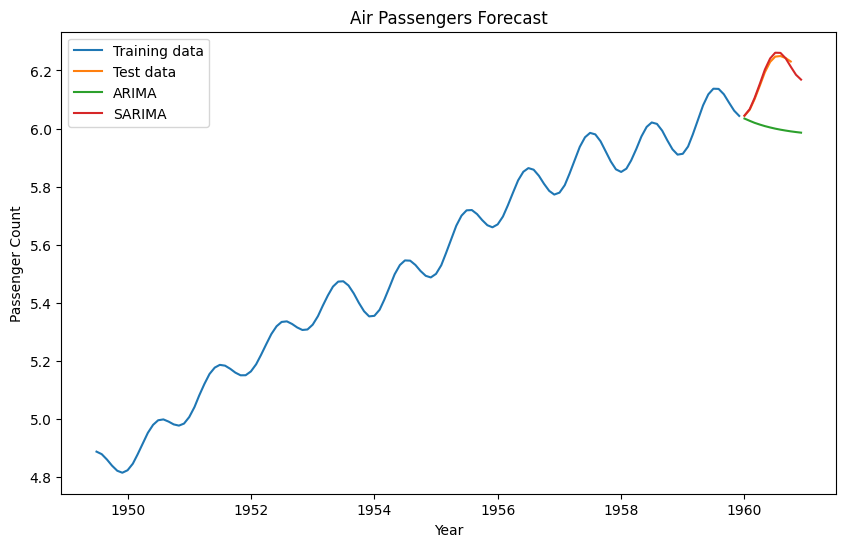

In [ ]:
# Visualize the forecasts
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training data')
plt.plot(test.index, test, label='Test data')
plt.plot(test.index, forecast_arima, label='ARIMA')
plt.plot(test.index, forecast_sarima, label='SARIMA')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.title('Air Passengers Forecast')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test set
predictions_arima = model_arima_fit.forecast(steps=len(test))
print(predictions_arima)
print("----")
predictions_sarima = model_sarima_fit.forecast(steps=len(test))
print(predictions_sarima)

1960-01-01    6.034646
1960-02-01    6.026775
1960-03-01    6.019883
1960-04-01    6.013849
1960-05-01    6.008565
1960-06-01    6.003939
1960-07-01    5.999888
1960-08-01    5.996341
1960-09-01    5.993236
1960-10-01    5.990517
1960-11-01    5.988136
1960-12-01    5.986051
Freq: MS, Name: predicted_mean, dtype: float64
----
1960-01-01    6.044851
1960-02-01    6.066940
1960-03-01    6.105399
1960-04-01    6.154093
1960-05-01    6.203315
1960-06-01    6.241406
1960-07-01    6.261166
1960-08-01    6.260631
1960-09-01    6.241878
1960-10-01    6.213199
1960-11-01    6.185244
1960-12-01    6.168638
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Apply interpolation to fill missing values
test_interpolated = test.interpolate()
print(test_interpolated)

            #Passengers
Month                  
1960-01-01          417
1960-02-01          391
1960-03-01          419
1960-04-01          461
1960-05-01          472
1960-06-01          535
1960-07-01          622
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432


In [ ]:
# Calculate evaluation metrics
mae_arima = mean_absolute_error(test_interpolated,predictions_arima)
print('ARIMA MAE:', mae_arima)

ARIMA MAE: 0.1793939195403468


In [ ]:
rmse_arima = mean_squared_error(test_interpolated, predictions_arima, squared=False)
print('SARIMA MAE:', rmse_arima)

SARIMA MAE: 0.19916484988390423


In [ ]:
mae_sarima = mean_absolute_error(test_interpolated, predictions_sarima)
print('SARIMA MAE:', mae_sarima)

SARIMA MAE: 0.015428576735932564


In [ ]:
rmse_sarima = mean_squared_error(test_interpolated, predictions_sarima, squared=False)
print('SARIMA RMSE:', rmse_sarima)

SARIMA RMSE: 0.023918544694226357


In [ ]:
# Number of periods to forecast
forecast_periods = 12

# Generate future dates for the forecasts
future_dates = pd.date_range(start=df.index[-1], periods=forecast_periods + 1, freq='M')[1:]
print(future_dates)
# Use the ARIMA model to make predictions
arima_forecast = model_arima_fit.forecast(steps=forecast_periods)
print(arima_forecast)


DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31', '1961-11-30', '1961-12-31'],
              dtype='datetime64[ns]', freq='M')
1960-01-01    433.451927
1960-02-01    417.984221
1960-03-01    426.393139
1960-04-01    421.821685
1960-05-01    424.306927
1960-06-01    422.955841
1960-07-01    423.690350
1960-08-01    423.291039
1960-09-01    423.508122
1960-10-01    423.390106
1960-11-01    423.454265
1960-12-01    423.419385
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Use the SARIMA model to make predictions
sarima_forecast = model_sarima_fit.get_forecast(steps=forecast_periods)
print(sarima_forecast)